Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.(10 баллов)

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.(35 баллов)

In [84]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from dateutil import parser

# Разведовательный анализ

In [87]:
# считываем данные
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')

In [88]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [32]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [58]:
# приведем необходимые колонки к типу datetime
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',\
       'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in date_columns:
    orders[column] = pd.to_datetime(orders[column])

In [7]:
# посчитаем сколько заказов с конкретным статусом
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [8]:
# посмотрим на количество пропущенных значений
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Как мы видим из данных покупкой можно считать заказ, оплата которого потвердилась

# Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

In [9]:
# создадим датафрэйм заказов с уникальными id покупателей
unique_ids = orders.merge(customers[['customer_id', 'customer_unique_id']], on='customer_id', how='inner')

In [10]:
# отсечем заказы с неподтвержденной оплатой и посчитаем сколько покупок совершил каждый пользователь
id_with_purchases = unique_ids.dropna(subset=['order_approved_at'])\
          .customer_unique_id.value_counts()

In [11]:
id_with_purchases[id_with_purchases == 1].shape[0]

93049

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

In [17]:
'''
1) Отсечем заказы с негативными статусами
2) Сделаем колонку с месяцем
3) Для каждого месяца и статуса посчитаем количество заказов
4) Для каждого статуса посчитаем среднее количество в месяц
'''
orders[orders.order_status.isin(['unavailable','canceled'])]\
    .assign(month = lambda raw: raw.order_purchase_timestamp.str[:7])\
    .groupby(['month','order_status'], as_index=False)\
    .order_id.nunique()\
    .groupby('order_status', as_index=False)\
    .order_id.mean()

,order_status,order_id
0,canceled,26.041667
1,unavailable,29.000000


# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [4]:
# к таблице items присоединить поле order_purchase_timestamp
items_with_date = order_items.merge(orders[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')

In [5]:
# создадим колонку с номером дня внутри недели
items_with_date['day_of_week'] = items_with_date.order_purchase_timestamp\
                                                .apply(lambda x : parser.parse(x).isocalendar()[2])

In [6]:
# считаем для каждого товара самый частый день покупки
items_with_date.groupby('product_id', as_index=False)\
    ['day_of_week'].apply(lambda x: x.value_counts().index[0])

,product_id,day_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,7
1,00088930e925c41fd95ebfe695fd2655,2
2,0009406fd7479715e4bef61dd91f2462,4
3,000b8f95fcb9e0096488278317764d19,3
4,000d9be29b5207b54e86aa1b1ac54872,2
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,7
32947,fff81cc3158d2725c0655ab9ba0f712c,1
32948,fff9553ac224cec9d15d49f5a263411f,5
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,2


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [12]:
'''
Необходимо посчитать количество дней в каждом месяце, для этого
1) создадим датафрэйм со всеми датами
2) создадим колонку с месяцем
3) посчитаем для каждого месяца количество недель
'''
calendar = pd.DataFrame(
    pd.date_range(orders.order_purchase_timestamp.min()[:10],
                  orders.order_purchase_timestamp.max()[:10]),
    columns = ['dates'])

In [14]:
calendar['month'] = calendar.dates.apply(lambda x: x.isoformat()[:7])

In [18]:
calendar = calendar.groupby('month', as_index=False)\
    .dates.nunique()\
    .assign(weeks = lambda x: x.dates/7)\
    [['month','weeks']]

In [36]:
'''
1)Отсекаем заказы, которые не являются покупками
2)Добавляем колонку с уникальным id
3)Создаем колонку с месяцем
4)Для каждого покупателя считаем количество заказов в каждом месяце
5)Добавляем информацию о количестве недель в месяце
6)Считаем сколько пользователь делает заказов в неделю в среднем(для каждого месяца)
'''
orders.dropna(subset=['order_approved_at'])\
    .merge(customers[['customer_id','customer_unique_id']],
           on='customer_id',
           how='left')\
    .assign(month = lambda raw: raw.order_purchase_timestamp.str[:7])\
    .groupby(['customer_unique_id','month'], as_index=False)\
    .order_id.nunique()\
    .merge(calendar, on='month', how='left')\
    .assign(frequency = lambda raw: raw.order_id/raw.weeks)\
    [['customer_unique_id','month','frequency']]

,customer_unique_id,month,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333
...,...,...,...
98036,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,0.233333
98037,fffea47cd6d3cc0a88bd621562a9d061,2017-12,0.225806
98038,ffff371b4d645b6ecea244b27531430a,2017-02,0.250000
98039,ffff5962728ec6157033ef9805bacc48,2018-05,0.225806


# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [39]:
# подготовим таблицу с заказами и месяцем
retention = orders.dropna(subset=['order_approved_at'])\
      .merge(customers[['customer_id','customer_unique_id']],
             on='customer_id',
             how='left')\
      .assign(month = lambda raw: raw.order_purchase_timestamp.str[:7])

In [40]:
# каждому пользователю присвоим когорту, по первому заказу
retention = retention.merge(
    retention.groupby('customer_unique_id', as_index=False)\
    .month.min()\
    .rename(columns={'month' : 'cohort'}),
    on='customer_unique_id',
    how='left'
)

In [45]:
# сделаем колонку с длительностью жизни когорты
retention['ret_month'] = retention.groupby('customer_unique_id', as_index=False)\
    .month\
    .cumcount()

In [46]:
retention['retention'] = 1

In [47]:
# развернем таблицу так, чтобы индексами сатли когорты, колонками - периоды жизни, значениями число вернувшихся пользователей
retention = pd.pivot_table(retention,
                           values='retention',
                           index='cohort',
                           columns='ret_month',
                           aggfunc=np.sum )

In [49]:
# перейдем от числа пользователей к долям и уберем нулевой месяц жизни
retention = retention.div(retention[0], axis=0).fillna(0).drop(0, axis=1)

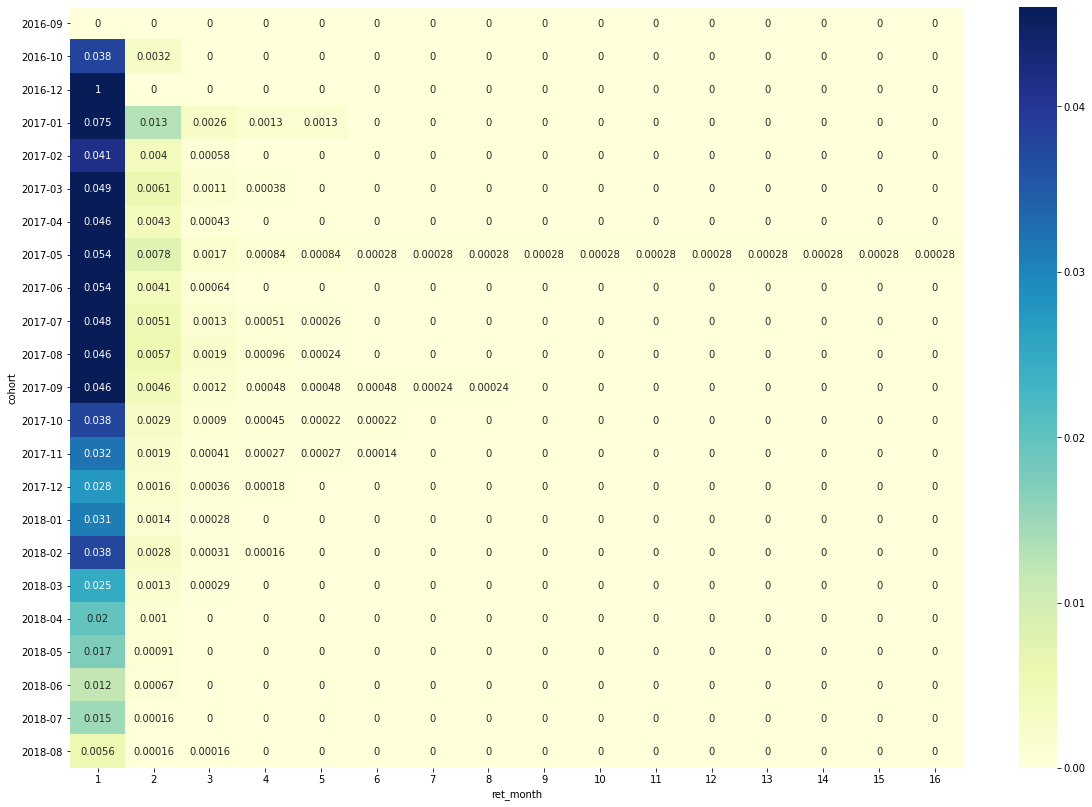

In [53]:
# Для удобства анализа сделаем тепловую карту
plt.figure(figsize=(20,14))
sns.heatmap(retention, robust=True, annot=True, cmap='YlGnBu')

# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [59]:
max_date = orders.order_purchase_timestamp.max()

In [68]:
orders['days_to_max'] = (max_date - orders.order_purchase_timestamp).dt.days

In [74]:
rfm = orders.merge(customers[['customer_id','customer_unique_id']],
             on='customer_id',
             how='left')\
      .merge(
             order_items.groupby('order_id', as_index=False)\
             .price.sum())\
      .groupby('customer_unique_id', as_index=False)\
      .agg({'days_to_max' : 'min',
            'order_id' : 'size',
            'price' : 'sum'})\
      [['customer_unique_id','days_to_max','order_id','price']]


In [77]:
intervals_r = list(rfm.days_to_max.describe())[3:]
intervals_f = [1,2,3,16]
intervals_m = list(rfm.price.describe())[3:]

In [80]:
rfm['recency'] = rfm.days_to_max.apply(lambda x: np.digitize(x,intervals_r)) 
rfm['frequency'] = rfm.order_id.apply(lambda x: np.digitize(x,intervals_f))
rfm['monetary'] = rfm.price.apply(lambda x: np.digitize(x,intervals_m))
rfm['rfm'] = rfm.recency.astype('str') + rfm.frequency.astype('str') + rfm.monetary.astype('str')

In [82]:
rfm.head()

,customer_unique_id,days_to_max,order_id,price,recency,frequency,monetary,rfm
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90,1,1,3,113
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,18.90,2,1,1,211
2,0000f46a3911fa3c0805444483337064,585,1,69.00,4,1,2,412
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99,3,1,1,311
4,0004aac84e0df4da2b147fca70cf8255,336,1,180.00,3,1,4,314


In [83]:
rfm.groupby('rfm', as_index = False)['days_to_max','order_id','price'].mean()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,rfm,days_to_max,order_id,price
0,111,104.699932,1.000000,29.157138
1,112,103.916477,1.000000,65.748422
2,113,106.716981,1.000000,118.320479
3,114,106.624241,1.000000,365.723449
4,121,102.142857,2.000000,36.253571
5,122,110.510417,2.000000,70.345417
6,123,104.745455,2.000000,121.330424
7,124,106.899083,2.000000,350.391904
8,132,85.000000,3.000000,72.107500
9,133,94.285714,3.000000,113.071429
